In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats


1. Import the raw data set into a Pandas DataFrame.

In [3]:
cars = pd.read_csv('Cars93.csv')
print(cars.columns)
cars.head(10)

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')


,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
6,7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,...,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
7,8,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,...,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
8,9,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,...,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
9,10,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,...,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


2. Clean the data and remove missing values. Drop any column that is not categorical or numeric. Let our target variable be MPG.highway again. Separate the independent variables from the dependent variable.

In [4]:
cars.isnull().sum()

Unnamed: 0             0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [5]:
cars[["Luggage.room", "Rear.seat.room"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Luggage.room    82 non-null     float64
 1   Rear.seat.room  91 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [6]:
imputer_continuos = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer_discrete = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

cars["Luggage.room"] = imputer_continuos.fit_transform(cars["Luggage.room"].values.reshape(-1,1))[:,0]
cars["Rear.seat.room"] = imputer_continuos.fit_transform(cars["Rear.seat.room"].values.reshape(-1,1))[:,0]
cars.isnull().sum()

Unnamed: 0            0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             93 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [8]:
print(list(cars.columns))
cars.head()

['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin', 'Make']


,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [9]:
cars = cars.drop(["Unnamed: 0"], axis = 1)

3. Generate dummy variables for the categorical features.

In [10]:
cars[["Manufacturer", "Model", "Type", "AirBags", "DriveTrain", "Cylinders", "Man.trans.avail", "Origin", "Make"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Manufacturer     93 non-null     object
 1   Model            93 non-null     object
 2   Type             93 non-null     object
 3   AirBags          93 non-null     object
 4   DriveTrain       93 non-null     object
 5   Cylinders        93 non-null     object
 6   Man.trans.avail  93 non-null     object
 7   Origin           93 non-null     object
 8   Make             93 non-null     object
dtypes: object(9)
memory usage: 6.7+ KB


In [11]:
cars = pd.get_dummies(cars, prefix='', prefix_sep='', columns=["Manufacturer", "Model", "Type", "AirBags", "DriveTrain", "Cylinders", "Man.trans.avail", "Origin", "Make"], drop_first=True)
cars.shape

(93, 249)

4. Create a training set that's 75% of your data set and a complementary test set with the remaining 25%. Specify random_state=0.

In [12]:
cars.corr()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,Toyota Camry,Toyota Celica,Toyota Previa,Toyota Tercel,Volkswagen Corrado,Volkswagen Eurovan,Volkswagen Fox,Volkswagen Passat,Volvo 240,Volvo 850
Min.Price,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,...,-0.023081,-0.035066,0.021264,-0.111771,0.069204,-0.006302,-0.100984,0.005683,0.056021,0.091976
Price,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,...,-0.014212,-0.012042,0.034621,-0.105368,0.041132,0.002065,-0.112964,0.005321,0.034621,0.078028
Max.Price,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,...,-0.006642,0.006662,0.044674,-0.095970,0.017116,0.007613,-0.117827,0.004762,0.015215,0.062730
MPG.city,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,...,-0.006819,0.049138,-0.081428,0.179704,-0.081428,-0.100081,0.049138,-0.025471,-0.025471,-0.044124
MPG.highway,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,...,-0.001691,0.057289,-0.139312,0.155590,-0.080332,-0.158972,0.076949,0.017969,-0.021351,-0.021351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Volkswagen Eurovan,-0.006302,0.002065,0.007613,-0.100081,-0.158972,-0.016950,-0.069705,-0.137129,0.123040,0.141776,...,-0.010870,-0.010870,-0.010870,-0.010870,-0.010870,1.000000,-0.010870,-0.010870,-0.010870,-0.010870
Volkswagen Fox,-0.100984,-0.112964,-0.117827,0.049138,0.076949,-0.087683,-0.125744,0.038532,0.045981,-0.136312,...,-0.010870,-0.010870,-0.010870,-0.010870,-0.010870,-0.010870,1.000000,-0.010870,-0.010870,-0.010870
Volkswagen Passat,0.005683,0.005321,0.004762,-0.025471,0.017969,-0.067473,-0.019670,0.091230,0.074482,0.058670,...,-0.010870,-0.010870,-0.010870,-0.010870,-0.010870,-0.010870,-0.010870,1.000000,-0.010870,-0.010870
Volvo 240,0.056021,0.034621,0.015215,-0.025471,-0.021351,-0.037159,-0.059698,0.020966,-0.024744,-0.027634,...,-0.010870,-0.010870,-0.010870,-0.010870,-0.010870,-0.010870,-0.010870,-0.010870,1.000000,-0.010870


In [13]:
target = "MPG.highway"
X = cars.copy().drop([target], axis=1)
Y = cars[target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

5. Train the model using the LinearRegression class. Leave all parameters at their default values.

In [14]:
reg = LinearRegression().fit(X_train, Y_train)

In [15]:
predictions = reg.predict(X_test)

In [16]:
print(X_test.shape, Y_test.shape, predictions.shape)

(24, 248) (24,) (24,)


6. Use your model to generate predictions on the test set, then create two scatter plots: one with predicted values against actual values, and another with residuals against predicted values. Print the coefficient of determination of the model with the .score() method.

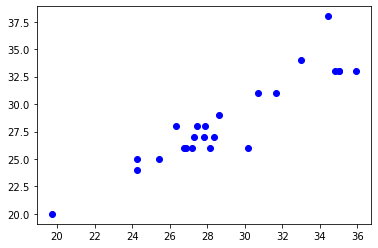

In [17]:
# predicted values against actual values
plt.scatter(predictions, Y_test, color = 'b')
plt.show()

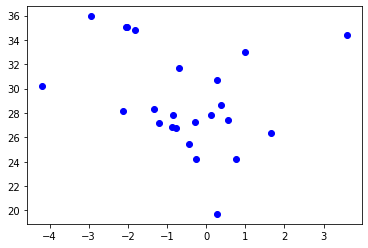

In [18]:
# residuals against predicted values
residuals = Y_test - predictions
plt.scatter(residuals, predictions, color = 'b')
plt.show()

In [19]:
reg.score(X_test, Y_test)

0.821037148151793

7. Print out the actual model in equation form, i.e., y = b + c1x1 + c2x2 + c3x3 + ....

In [20]:
coefs = reg.coef_
intercept = reg.intercept_
equation = f'y = {intercept}'
poly_count = 1
for i in coefs:
    if(i == 0):continue
    equation += f" + ({i})x_{poly_count}"
    poly_count += 1
print(equation)

y = 8.888706982141443 + (0.03533203464238231)x_1 + (-0.14250167239380337)x_2 + (0.08645651101639869)x_3 + (0.8303319326705649)x_4 + (0.417333028678659)x_5 + (-0.003098987180117252)x_6 + (0.0002152301663994327)x_7 + (-0.00025056032762993397)x_8 + (-0.10761623206518448)x_9 + (-0.5236876070685731)x_10 + (0.053860795431489084)x_11 + (0.027986977678191027)x_12 + (0.01404517543143273)x_13 + (-0.06755197266442901)x_14 + (-0.12362391138497081)x_15 + (0.1700585486774982)x_16 + (-0.001523838911941966)x_17 + (0.14032291664690233)x_18 + (0.5982365730025021)x_19 + (0.49681047454249994)x_20 + (0.5589405460463366)x_21 + (0.6145124563068283)x_22 + (-0.03625243569407975)x_23 + (-0.6979598999326324)x_24 + (-0.4094685292875004)x_25 + (-0.6795669593490876)x_26 + (-0.6160856021466613)x_27 + (0.37268228075496623)x_28 + (-0.007966192768263762)x_29 + (0.005987991267990277)x_30 + (-0.3487816031377319)x_31 + (-0.43977447168575584)x_32 + (0.3181304786605473)x_33 + (0.8306718207978202)x_34 + (0.2938986462267336)x